# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [3]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

fitbit.sample(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
196,2015-11-20,3395,15221,11.31,6,464.000,316,40,58,2004,...,7.027706,Friday,4.0,1,4.483333,87.622150,8.733333,94.244604,November,11
221,2015-12-15,2711,8566,6.39,15,898.000,137,28,33,1038,...,3.970561,Tuesday,1.0,1,0.000000,0.000000,5.300000,86.178862,December,12
33,2015-06-10,275,714,5.31,12,785.000,220,20,4,1081,...,3.299480,Wednesday,2.0,1,6.466667,93.493976,5.200000,84.552846,June,6
158,2015-10-13,2698,7015,5.21,10,1.244,130,37,29,1036,...,3.237343,Tuesday,1.0,1,0.000000,0.000000,6.450000,95.792079,October,10
122,2015-09-07,2829,9487,7.05,17,1.156,152,40,28,1197,...,4.380666,Monday,0.0,1,5.266667,86.338798,2.083333,88.652482,September,9
226,2015-12-20,3391,15636,11.73,2,550.000,316,56,23,1973,...,7.288682,Sunday,6.0,0,4.033333,95.275591,5.350000,88.919668,December,12
207,2015-12-01,3232,1681,12.49,14,750.000,152,9,97,1618,...,7.760924,Tuesday,1.0,1,0.000000,0.000000,1.150000,97.183099,December,12
164,2015-10-19,2581,6293,4.68,1,854.000,226,0,0,9560,...,2.908016,Monday,0.0,1,0.000000,0.000000,0.000000,0.000000,October,10
291,2016-02-22,2594,6592,4.93,10,1.234,155,23,14,9580,...,3.063359,Monday,0.0,1,0.000000,0.000000,5.783333,88.295165,February,2
187,2015-11-11,2867,12351,9.18,1,981.000,181,66,24,1353,...,5.704186,Wednesday,2.0,1,6.516667,94.444444,6.383333,88.863109,November,11


In [4]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [5]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("darkgrid")

In [6]:
fitbit.Months_encoded.unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

In [7]:
fitbit.groupby("Months_encoded").mean()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency
Months_encoded,,,,,,,,,,,,,,,,,,,,
1,2812.806452,9892.064516,7.912581,8.580645,573.702000,249.838710,27.548387,27.387097,1705.741935,310.516129,29.483871,17.193548,340.161290,4.916648,3.193548,0.677419,5.175269,79.535533,5.245699,79.545673
2,2600.100000,8922.866667,7.143667,9.666667,598.077133,214.933333,25.166667,25.033333,1833.033333,269.933333,24.366667,14.533333,294.600000,4.438867,2.933333,0.733333,4.498889,73.325942,4.605000,73.287582
3,2281.258065,10312.935484,9.184194,9.935484,490.865000,220.935484,13.096774,41.451613,2443.387097,242.290323,22.387097,13.483871,265.387097,5.706792,2.903226,0.741935,4.038172,70.799130,3.955914,70.782667
4,3030.800000,13079.033333,11.190667,11.566667,638.469700,293.866667,13.800000,48.866667,1710.333333,322.133333,35.500000,18.566667,357.766667,6.953556,3.100000,0.700000,5.368889,84.023962,5.293889,84.100439
5,2836.580645,10620.096774,8.799677,10.741935,654.149161,229.580645,28.258065,46.806452,3391.419355,353.612903,35.967742,21.677419,394.935484,5.467864,3.193548,0.677419,5.893548,86.669604,5.638710,83.934522
6,2971.666667,12536.166667,10.881667,24.366667,655.641500,237.766667,33.600000,60.866667,1686.400000,354.800000,36.666667,20.600000,399.266667,6.761552,2.833333,0.733333,5.913333,85.083234,5.939444,84.943985
7,2699.935484,9193.322581,8.695484,16.000000,644.071323,240.967742,33.161290,37.419355,1734.967742,347.161290,30.322581,15.645161,385.387097,5.403122,3.000000,0.741935,5.786022,86.959627,5.764516,87.054673
8,2844.967742,11584.774194,9.059677,14.129032,497.499000,265.322581,25.903226,28.516129,1502.483871,333.387097,29.451613,17.774194,368.903226,5.629421,3.064516,0.677419,5.556452,84.537428,5.568280,84.422750
9,2908.000000,9191.333333,7.836333,12.266667,535.728967,233.233333,32.700000,29.033333,1862.033333,259.700000,24.900000,14.966667,288.633333,4.869270,2.900000,0.733333,4.328333,65.660698,4.307778,65.604344


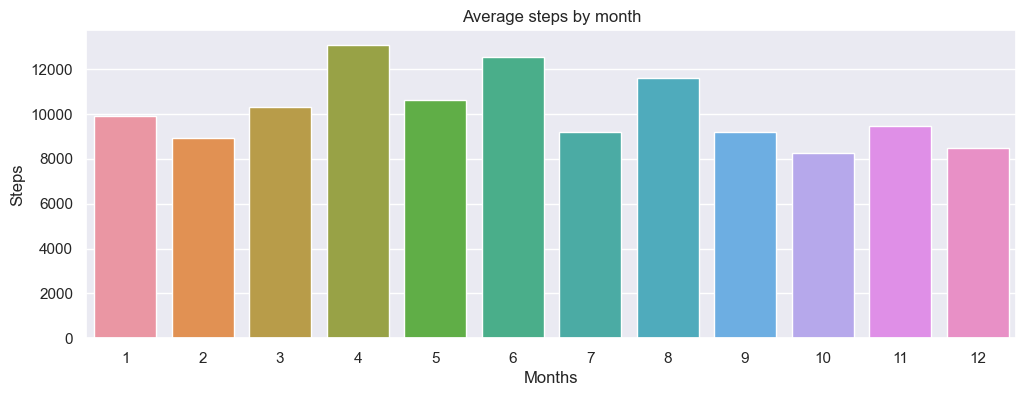

In [8]:
barplot = sns.barplot(x=fitbit.Months_encoded, y=fitbit.Steps, ci=None)
plt.title('Average steps by month')
plt.xlabel("Months");

In [9]:
# AVERAGE STEPS BY MONTH:
# Most activity in the months April, June and August

In [10]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

fitbit.groupby("Work_or_Weekend").mean()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
Work_or_Weekend,,,,,,,,,,,,,,,,,,,,
0,2647.628571,10064.238095,8.175619,6.885714,530.831171,263.419048,22.628571,30.638095,1901.523810,267.495238,26.895238,15.609524,297.523810,5.080093,5.495238,4.458254,74.683679,4.606190,75.650482,6.447619
1,2779.122137,10144.572519,8.698817,13.664122,577.201076,225.580153,27.580153,37.759542,2101.305344,299.690840,28.454198,16.431298,330.889313,5.405192,2.015267,4.994847,77.035729,4.903626,76.307944,6.522901


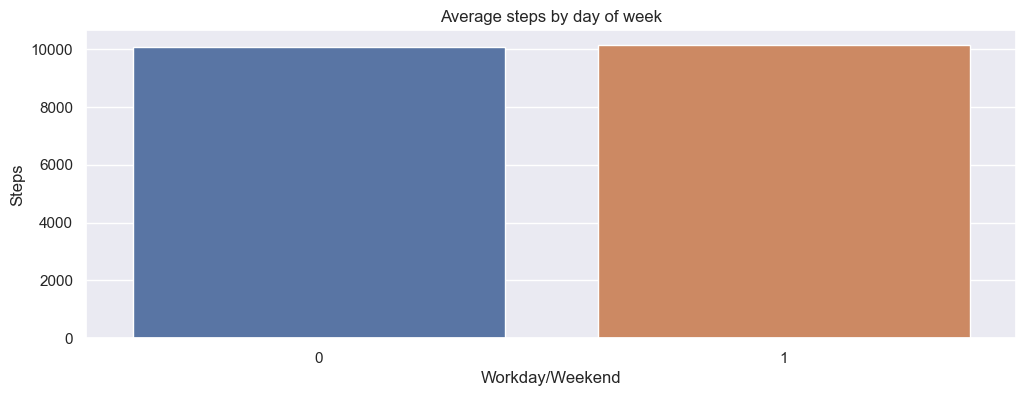

In [11]:
barplot = sns.barplot(x=fitbit.Work_or_Weekend, y=fitbit.Steps, ci=None)
plt.title('Average steps by day of week')
plt.xlabel("Workday/Weekend");

In [12]:
# AVERAGE STEPS BY WORK_OR_WEEKEND:
# No significant difference in activity

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [13]:
# ???

col_choice = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for pos, axis1 in enumerate(col_choice):   # Pick a first col
    for axis2 in enumerate(col_choice[pos+1:]):   # Pick a later col
        plt.scatter(fitbit.loc[:, axis1], fitbit.loc[:, axis2])

KeyError: '[0] not in index'

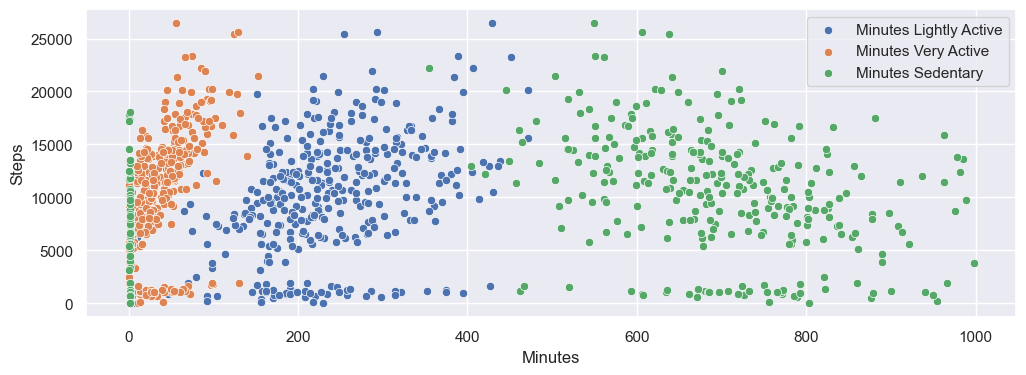

In [14]:
# your code here

sns.scatterplot(x='Minutes Lightly Active', y='Steps', data=fitbit);
sns.scatterplot(x='Minutes Very Active', y='Steps', data=fitbit);
sns.scatterplot(x='Minutes Sedentary', y='Steps', data=fitbit);

plt.xlabel("Minutes");
plt.legend(labels = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']);


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [15]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [16]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
5,6,0.0,3,"Moran, Mr. James",male,23.926502,0,0,330877,8.4583,U0,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [17]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [18]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(exclude=np.number)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [19]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})

# classic ???

#### Use the right visulalization to show the distribution of column `Age`.

In [20]:
# your code here

titanic.Age = titanic.Age.apply(lambda x: int(x))
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29,0,0,359309,8.0500,U0,S


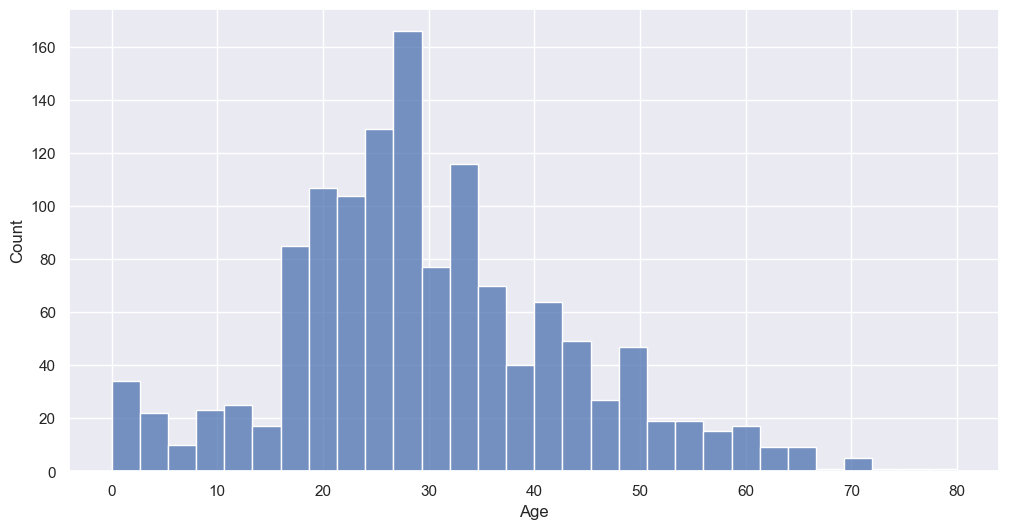

In [21]:
sns.histplot(x=titanic.Age.dropna(), bins=30);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

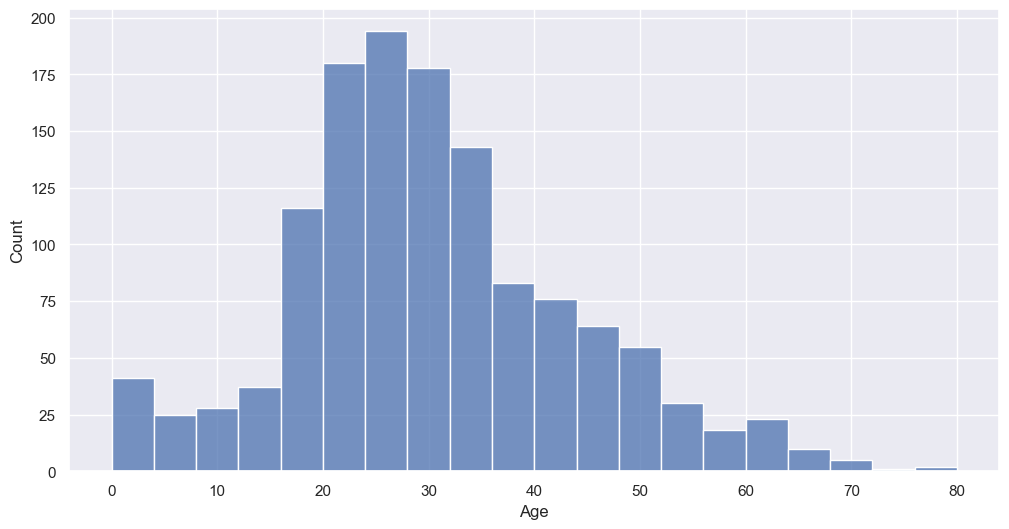

In [22]:
sns.histplot(x=titanic.Age.dropna(), bins=20);


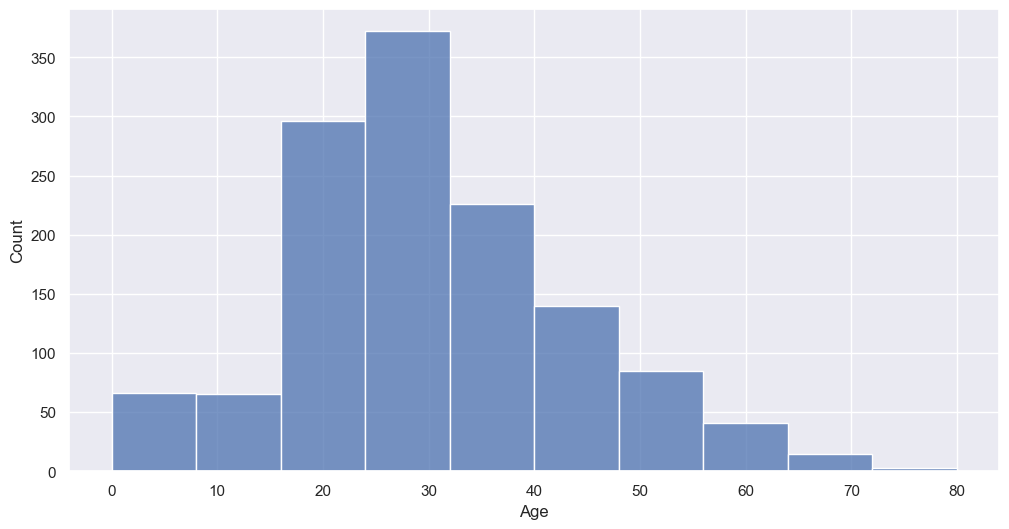

In [23]:
# your code here

sns.histplot(x=titanic.Age.dropna(), bins=10);

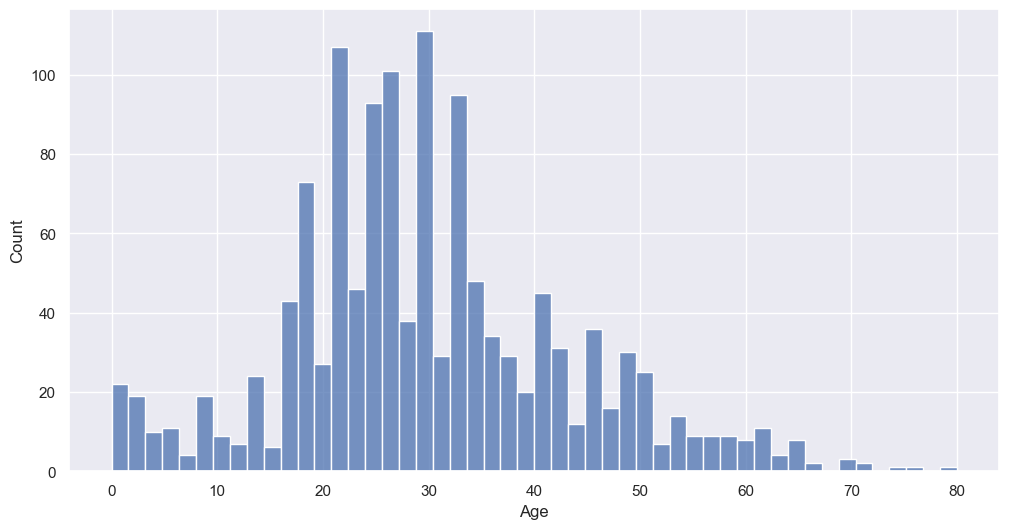

In [24]:
sns.histplot(x=titanic.Age.dropna(), bins=50);

#### How does the bin size affect your plot?

In [25]:
"""
It gives different range within each bin. For example, in bins=10 all the values from age 0-10 are joined together 
and represented in one bar.
In bins=50, on the contrary, each bar represents approximately 1,5 year range (all the passengers in that age bracket)
"""

'\nIt gives different range within each bin. For example, in bins=10 all the values from age 0-10 are joined together \nand represented in one bar.\nIn bins=50, on the contrary, each bar represents approximately 1,5 year range (all the passengers in that age bracket)\n'

#### Use seaborn to show the distribution of column `Age`.

In [26]:
# your code here - Already done above ??

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

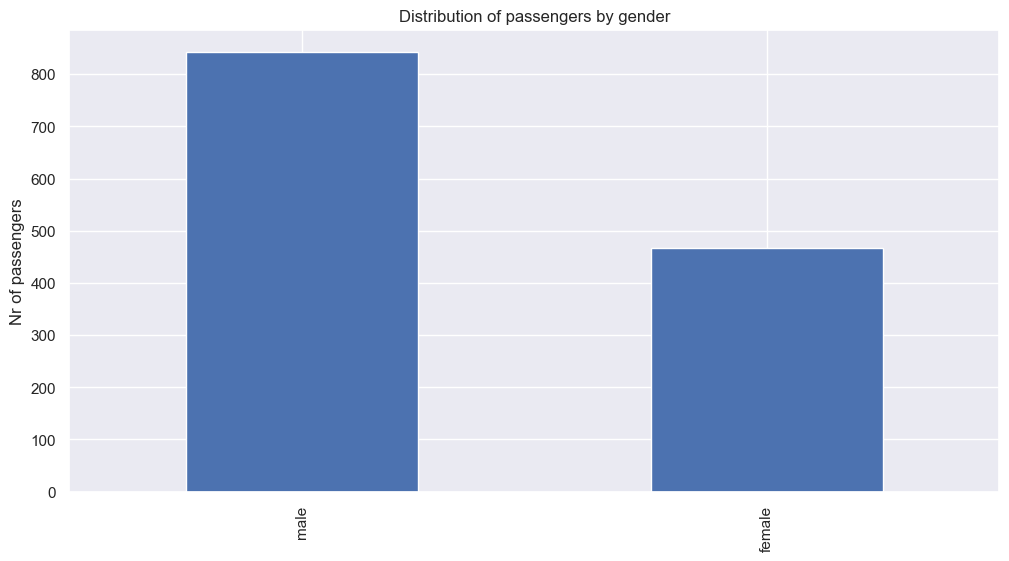

In [27]:
# Method 1 - matplotlib

titanic.Gender.value_counts().plot(kind='bar', title='Distribution of passengers by gender')

plt.ylabel("Nr of passengers");



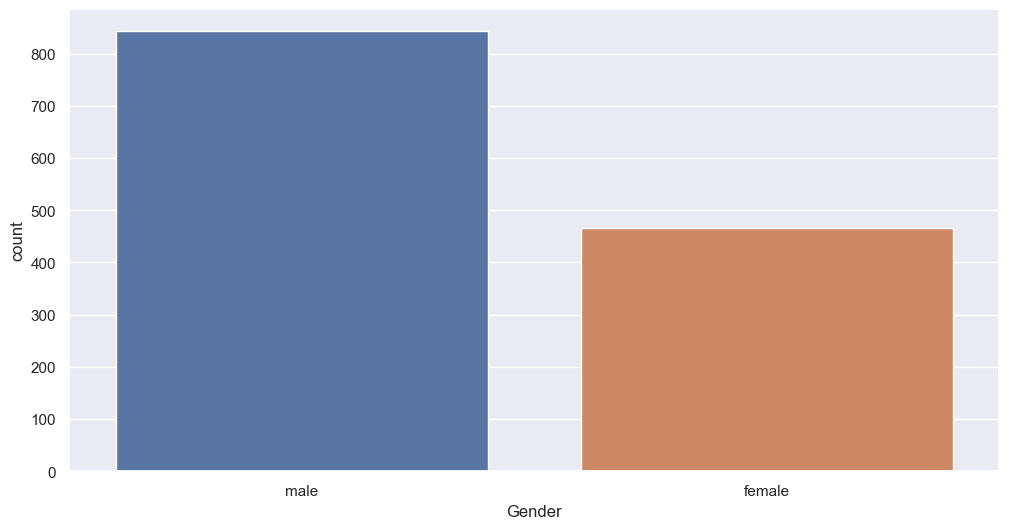

In [28]:
# Method 2 - seaborn

sns.countplot(data = titanic, x="Gender");



#### Use the right plot to visualize the column `Pclass`.

In [25]:
titanic.Pclass.unique()

array([3, 1, 2])

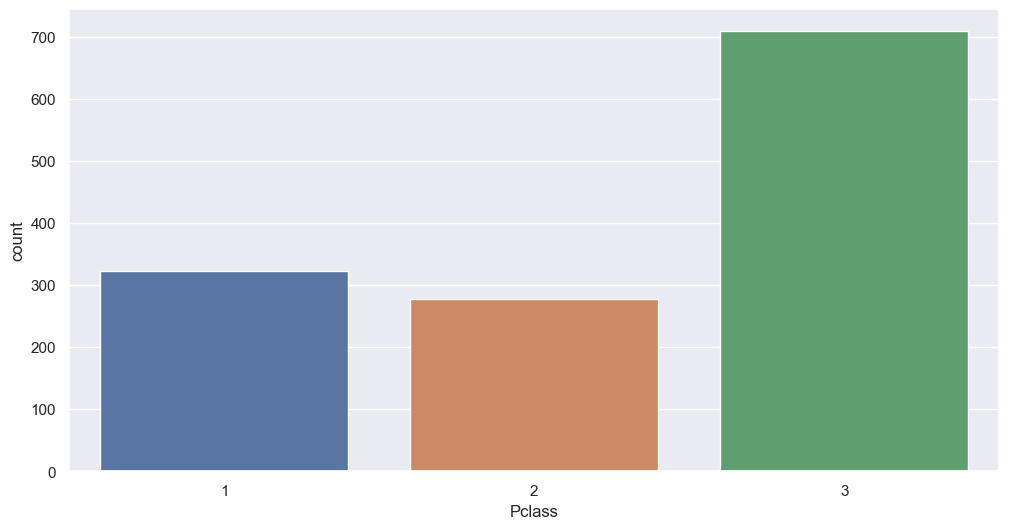

In [26]:
sns.countplot(data = titanic, x="Pclass");

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

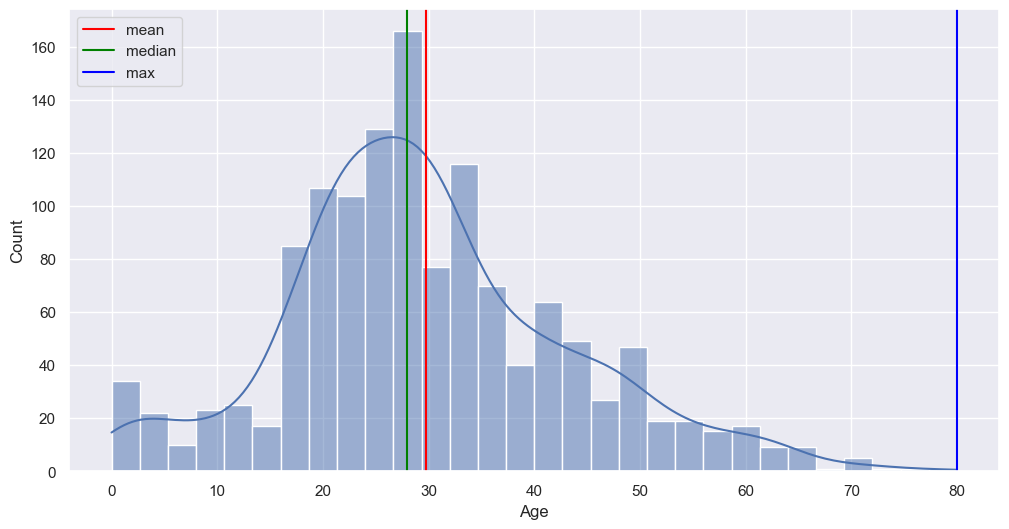

In [27]:
graf = sns.histplot(x=titanic.Age, kde=True)

graf.axvline(x=titanic.Age.mean(), c='red', label='mean')
graf.axvline(x=titanic.Age.median(), c='green', label='median')
graf.axvline(x=titanic.Age.max(), c='blue', label='max')

plt.legend();


#### What does the last plot tell you about the feature `Age`?

In [28]:
"""
We can use histplot with KDE.
The distribution shows that most of the passengers were of average age of 30 (mean and median).
The histogram of Age shows the biggest share of passengers were of age between 15-30 y.o.
The maximum age is around 80 years old.
"""

'\nWe can use histplot with KDE.\nThe distribution shows that most of the passangers were below the average age of 30 (mean and median).\nThe maximum age is around 80 years old.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [29]:
# The same as above ??

#### What additional information does the last plot provide about feature `Age`?

In [30]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

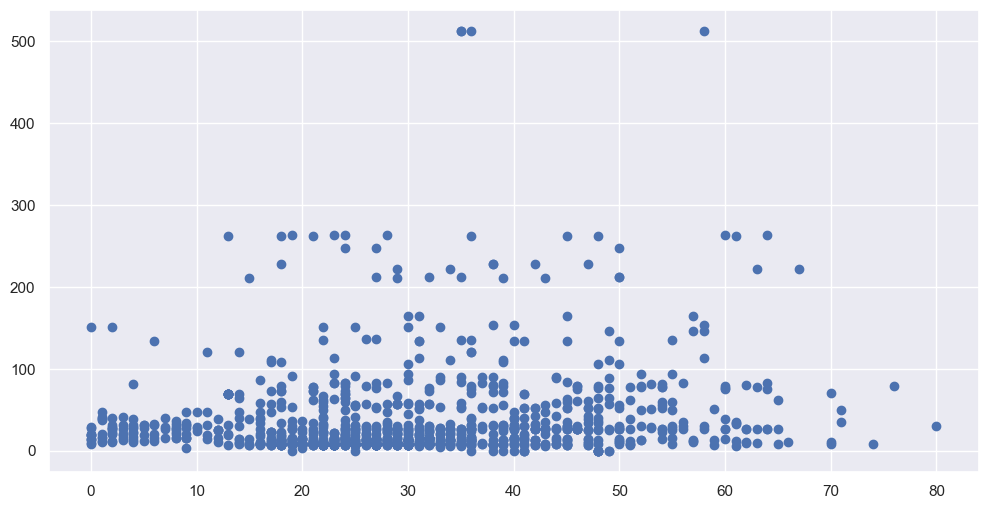

In [34]:
# Method 1 - matplotlib

plt.plot( 'Age', 'Fare', data=titanic, linestyle='none', marker='o')
plt.show();

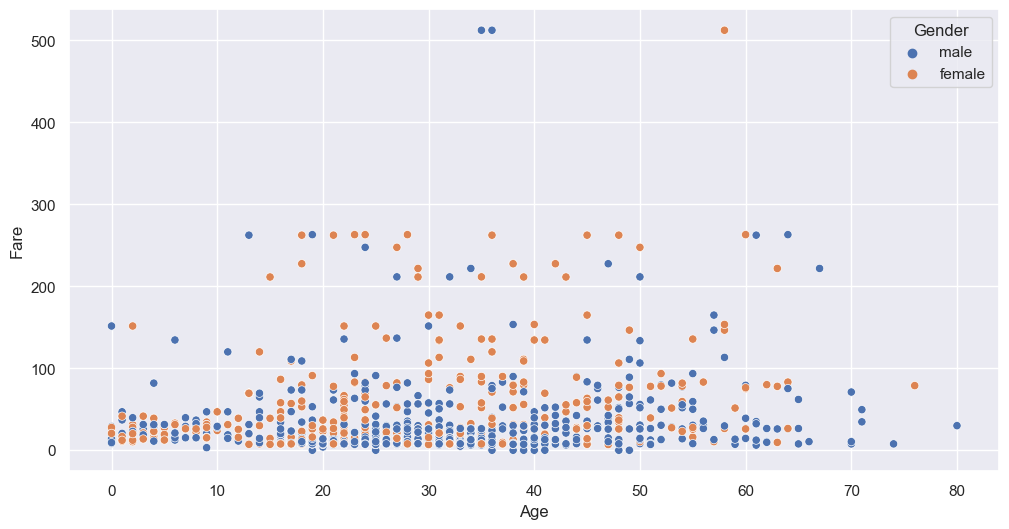

In [33]:
# Method 2 - seaborn

sns.scatterplot(x="Age", y="Fare", hue='Gender', data=titanic);


#### Plot the correlation matrix using seaborn.

In [33]:
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025248,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.064080,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.429681,0.060832,0.018322,-0.558683
Age,0.025248,-0.064080,-0.429681,1.000000,-0.260134,-0.143979,0.173464
SibSp,-0.055224,-0.035322,0.060832,-0.260134,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.143979,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.173464,0.160349,0.221635,1.000000


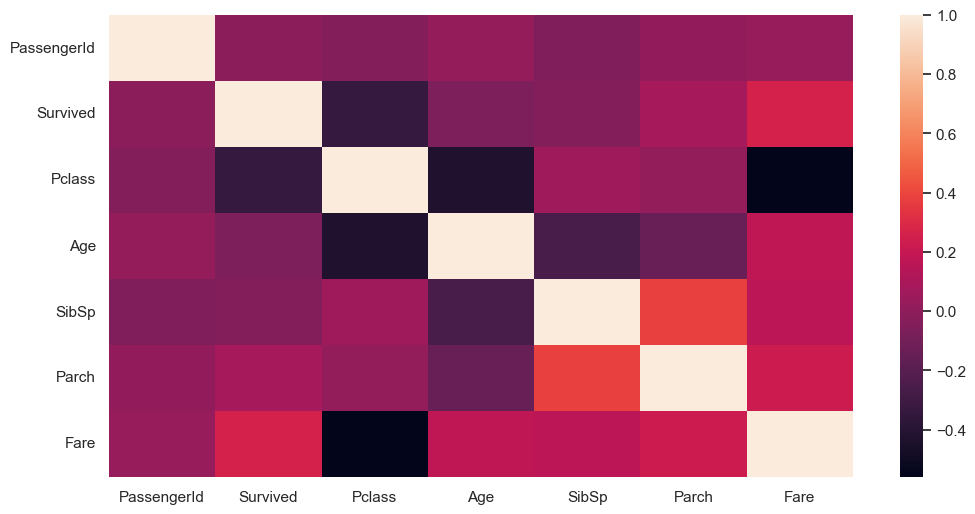

In [34]:
sns.heatmap(corr);

#### What are the most correlated features?

In [35]:
"""
Fare+Pclass, Age+Pclass, Survived+Pclass
"""

'\nFare+Pclass, Age+Pclass, Survived+Pclass\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

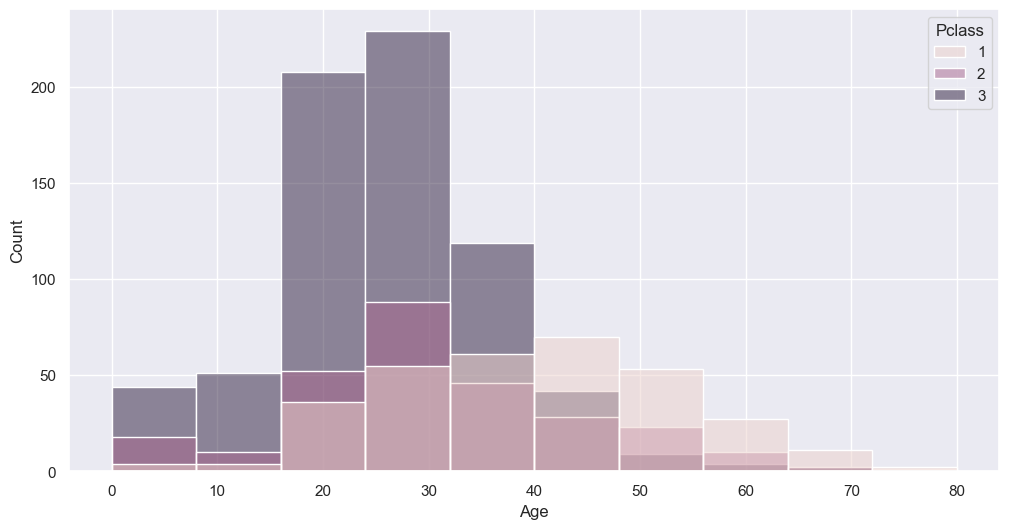

In [36]:
sns.histplot(data=titanic, x="Age", hue="Pclass", multiple="layer", bins=10);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

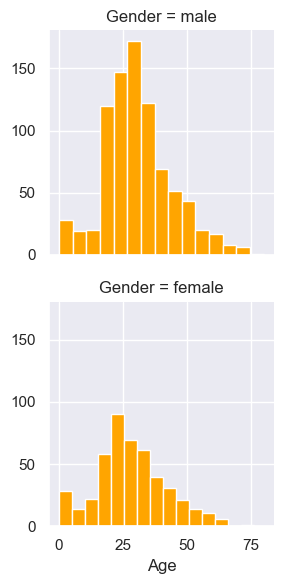

In [35]:
graph = sns.FacetGrid(titanic, row ='Gender')
graph.map(plt.hist, 'Age', bins = 15, color ='orange')
plt.show();